<a href="https://colab.research.google.com/github/kernelmans/my-ai-codes/blob/chatgpt-app/gan1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cloning into 'stylegan2-ada-pytorch'...
remote: Enumerating objects: 131, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 131 (delta 0), reused 0 (delta 0), pack-reused 129 (from 2)
Receiving objects: 100% (131/131), 1.13 MiB | 42.88 MiB/s, done.
Resolving deltas: 100% (57/57), done.
/content/stylegan2-pytorch/stylegan2-pytorch/stylegan2-pytorch/stylegan2-pytorch/stylegan2-ada-pytorch/stylegan2-ada-pytorch/stylegan2-ada-pytorch
--2025-09-23 20:34:02--  https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl
Resolving nvlabs-fi-cdn.nvidia.com (nvlabs-fi-cdn.nvidia.com)... 13.35.37.106, 13.35.37.105, 13.35.37.115, ...
Connecting to nvlabs-fi-cdn.nvidia.com (nvlabs-fi-cdn.nvidia.com)|13.35.37.106|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 381624121 (364M) [binary/octet-stream]
Saving to: ‘ffhq.pkl’

ffhq.pkl            100%[===================>] 363.94M  21.8MB/s    in 18s     

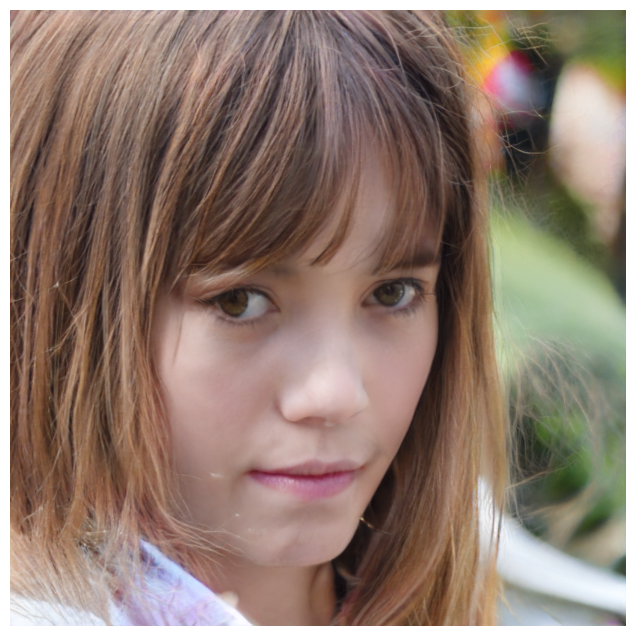

In [7]:
# ✅ Notebook complet pour Colab : Génération de visages avec StyleGAN2-ADA (officiel NVIDIA)

# ⭐️ 1. Cloner le repo NVIDIA StyleGAN2‑ADA‑PyTorch
!git clone https://github.com/NVlabs/stylegan2-ada-pytorch.git
%cd stylegan2-ada-pytorch

# ⭐️ 2. Installer les dépendances
!pip install ninja imageio imageio-ffmpeg matplotlib Pillow

# ⭐️ 3. Télécharger les poids FFHQ au format .pkl (visages humains)
!wget https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl -O ffhq.pkl

# ⭐️ 4. Importer les bibliothèques
import torch
import pickle
import dnnlib
import legacy
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

# ⭐️ 5. Charger le modèle à partir du .pkl

device = 'cuda' if torch.cuda.is_available() else 'cpu'

with open('ffhq.pkl', 'rb') as f:
    G = legacy.load_network_pkl(f)['G_ema'].to(device)  # G_ema = générateur moyen

G.eval()

# ⭐️ 6. Générer un vecteur latent et produire une image
z = torch.randn(1, G.z_dim).to(device)
label = torch.zeros([1, G.c_dim], device=device)  # pour FFHQ, c_dim = 0 → pas de condition

with torch.no_grad():
    img = G(z, label, truncation_psi=1.0, noise_mode='const')

# ⭐️ 7. Normaliser et afficher l'image
img = (img.clamp(-1, 1) + 1) / 2.0

plt.figure(figsize=(8, 8))
plt.axis("off")
plt.imshow(make_grid(img, nrow=1).permute(1, 2, 0).cpu().numpy())